# Well data exploration

This notebook shows the analysis and visualization of the wells and production data, stored in a data base. 
The data is loaded with the help of sqlalchemy library and analysed using numpy, pandas and matplotlib for the identification of relationships between the chosen variables.

In [1]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
#Send database to SQLite, create an engine and read SQL file
db_url = "sqlite:///ipynb_checkpoints\\wells_data.db"
engine = create_engine(db_url)
wells_data = pd.read_sql("wells_data", con = engine)
wells_data

,index,wlbNpdidWellbore,dscNpdidDiscovery,fldNpdidField,fclNpdidFacilityDrilling,fclNpdidFacilityProducing,wlbNpdidWellboreReclass,prlNpdidProductionLicence,wlbWellboreName,wlbWell,...,wlbSubSea,wlbKickOffPoint,wlbLicenceTargetName,wlbPluggedDate,wlbPluggedAbandonDate,prlNpdidProdLicenceTarget,wlbNpdidSiteSurvey,wlbSiteSurvey,wlbDateReclass,wlbPointGeometryWKT
0,0,28,44990.0,NaN,288280.0,NaN,0,21348.0,7/8-3,7/8-3,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.5460499996279968 57.258494000193025)
1,1,30,NaN,NaN,287848.0,NaN,0,21356.0,7/11-8,7/11-8,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.5295830008933171 57.213871999628537)
2,2,42,44966.0,43792.0,287956.0,NaN,0,21356.0,7/11-5,7/11-5,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4982029996618897 57.135107999856238)
3,3,57,23296230.0,43785.0,271693.0,NaN,0,20900.0,7/11-7,7/11-7,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4346719996169637 57.069455999904839)
4,4,149,44960.0,43785.0,296407.0,NaN,0,20900.0,7/11-1,7/11-1,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4401110006239985 57.070999999716726)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,8243,5743,NaN,NaN,289441.0,NaN,0,2490623.0,25/10-U-3,25/10-U-3,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,None
8244,8244,7685,NaN,NaN,373521.0,NaN,0,21559610.0,6306/5-U-1,6306/5-U-1,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,None
8245,8245,7810,NaN,NaN,289441.0,NaN,0,NaN,7934/6-U-3,7934/6-U-3,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,None
8246,8246,8412,NaN,NaN,461030.0,NaN,0,28942014.0,2/6-U-1,2/6-U-1,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,None


In [3]:
wells_data.to_sql("wells_data", con = engine, if_exists = "replace", index = False)

8248

In [ ]:
#Save file as well_data.xlsx
writer = pd.ExcelWriter('wells_data.xlsx')
wells_data.to_excel(writer, sheet_name='well_data')
writer.save()

### Wells Data

1. Make a scatter Plot of the bottom hole temperature (vertical axis) 
according to the total depth (horizontal axis); try with and with out 
removing the 0° temperature value;

In [5]:
wells_data.head()

,index,wlbNpdidWellbore,dscNpdidDiscovery,fldNpdidField,fclNpdidFacilityDrilling,fclNpdidFacilityProducing,wlbNpdidWellboreReclass,prlNpdidProductionLicence,wlbWellboreName,wlbWell,...,wlbSubSea,wlbKickOffPoint,wlbLicenceTargetName,wlbPluggedDate,wlbPluggedAbandonDate,prlNpdidProdLicenceTarget,wlbNpdidSiteSurvey,wlbSiteSurvey,wlbDateReclass,wlbPointGeometryWKT
0,0,28,44990.0,NaN,288280.0,NaN,0,21348.0,7/8-3,7/8-3,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.5460499996279968 57.258494000193025)
1,1,30,NaN,NaN,287848.0,NaN,0,21356.0,7/11-8,7/11-8,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.5295830008933171 57.213871999628537)
2,2,42,44966.0,43792.0,287956.0,NaN,0,21356.0,7/11-5,7/11-5,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4982029996618897 57.135107999856238)
3,3,57,23296230.0,43785.0,271693.0,NaN,0,20900.0,7/11-7,7/11-7,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4346719996169637 57.069455999904839)
4,4,149,44960.0,43785.0,296407.0,NaN,0,20900.0,7/11-1,7/11-1,...,NO,0.0,NaN,NaT,NaT,NaN,NaN,None,NaT,POINT (2.4401110006239985 57.070999999716726)


In [6]:
wells_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,8238,8239,8240,8241,8242,8243,8244,8245,8246,8247
index,0,1,2,3,4,5,6,7,8,9,...,8238,8239,8240,8241,8242,8243,8244,8245,8246,8247
wlbNpdidWellbore,28,30,42,57,149,156,158,159,167,237,...,2191,5355,5357,5741,5742,5743,7685,7810,8412,8413
dscNpdidDiscovery,44990.0,NaN,44966.0,23296230.0,44960.0,44960.0,NaN,44960.0,44966.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fldNpdidField,NaN,NaN,43792.0,43785.0,43785.0,43785.0,NaN,43785.0,43792.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fclNpdidFacilityDrilling,288280.0,287848.0,287956.0,271693.0,296407.0,288496.0,296407.0,288496.0,296407.0,296407.0,...,NaN,373600.0,373600.0,289441.0,289441.0,289441.0,373521.0,289441.0,461030.0,461030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prlNpdidProdLicenceTarget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wlbNpdidSiteSurvey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wlbSiteSurvey,None,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wlbDateReclass,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbBottomHoleTemperature'>

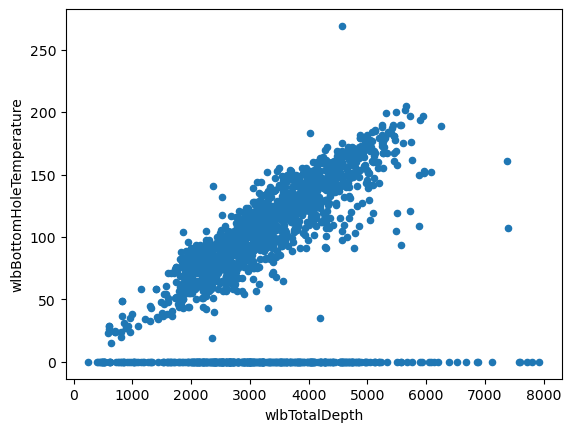

In [7]:
# Make a scatter plot for bottom hole temperature dependence on the depth
wells_data.plot.scatter('wlbTotalDepth', 'wlbBottomHoleTemperature')

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbBottomHoleTemperature'>

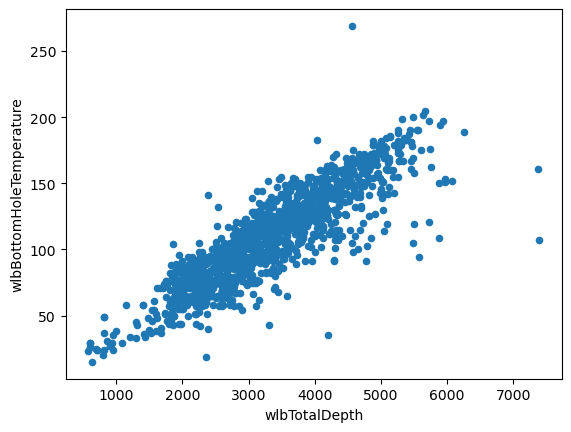

In [8]:
# Make the same scatter plot removing the 0° temperature value
dep_temp = wells_data.filter(items = ['wlbTotalDepth', 'wlbBottomHoleTemperature'])
dep_temp = dep_temp[dep_temp['wlbBottomHoleTemperature'] != 0]
dep_temp.plot.scatter('wlbTotalDepth', 'wlbBottomHoleTemperature')

2. Make a scatter Plot of the drilling days (vertical axis) according 
to the total depth (horizontal axis); use query function to keep only 0 < wlbDrillingDays < 800

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbDrillingDays'>

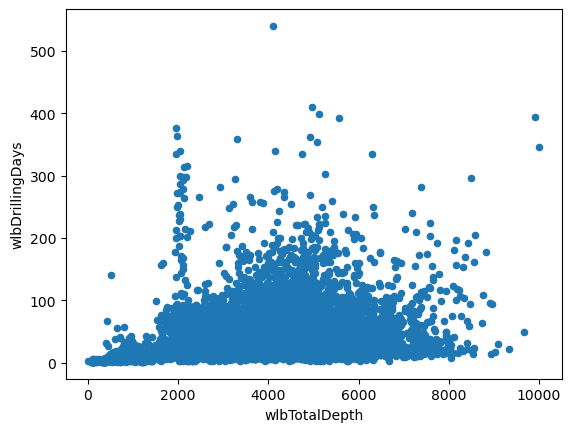

In [9]:
days_depth = wells_data.filter(items = ['wlbDrillingDays','wlbTotalDepth'])
q_days_depth = days_depth.query('0 < wlbDrillingDays < 800')
q_days_depth.plot.scatter('wlbTotalDepth', 'wlbDrillingDays')

3. Calculate the mean of the total depth according to the "Age At Td", 
show it as a table, sorted by mean total depth

In [10]:
age_mean_depth = wells_data.filter(items = ["wlbAgeAtTd", "wlbTotalDepth"]).groupby("wlbAgeAtTd").agg('mean')
age_mean_depth.sort_values("wlbTotalDepth", ascending = False)

,wlbTotalDepth
wlbAgeAtTd,
CRETACEOUS,4449.833333
DEVONIAN,4438.000000
JURASSIC,4395.555556
EARLY PERMIAN,3813.605714
LATE JURASSIC,3656.541176
EARLY JURASSIC,3631.920842
MIDDLE JURASSIC,3627.551675
CAMPANIAN,3574.000000
INDETERMINATE,3502.000000


### Production Data

1. Make a plot with the monthly production data (Oil, Gas and Water) of the `7405` NPDCode Volve according to the time. You will need to add and `monthly` column, create by concatenating the `Year` and the `Month` columns; Plot: vertical axis: the 3 productions (Oil, Gas and Water) and horizontal axis: the month and the year (ex: 2020-01).

In [12]:
production_data = pd.read_excel("ipynb_checkpoints\Volve_production_data.xlsx", sheet_name = 'Monthly Production Data')
production_data_f = production_data.filter(items = ["Year", "Month", "Oil (Sm3)", "Gas (Sm3)", "Water (Sm3)", "NPDCode"])
production_q = production_data_f.query("NPDCode == 7405") #leave only the well with NPDCode = 7405

production_q["Year"] = pd.to_datetime(production_q.Year, format = "%Y") #Transform the Year column into datetime format
production_q["Month"] = pd.to_datetime(production_q.Month, format = "%m") #Transform the Month column into datetime format

#Convert datetime to a formatted string and concatenate
production_q["Monthly"] = production_q["Year"].dt.strftime("%Y") +"-" + production_q["Month"].dt.strftime('%m')
production_q

C:\Users\Мартина\AppData\Local\Temp\ipykernel_10380\3004476719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_q["Year"] = pd.to_datetime(production_q.Year, format = "%Y") #Transform the Year column into datetime format
C:\Users\Мартина\AppData\Local\Temp\ipykernel_10380\3004476719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_q["Month"] = pd.to_datetime(production_q.Month, format = "%m") #Transform the Month column into datetime format
C:\Users\Мартина\AppData\Local\Temp\ipy

,Year,Month,Oil (Sm3),Gas (Sm3),Water (Sm3),NPDCode,Monthly
0,2014-01-01,1900-04-01,11142.47,1597936.65,0.00,7405,2014-04
1,2014-01-01,1900-05-01,24901.95,3496229.65,783.48,7405,2014-05
2,2014-01-01,1900-06-01,19617.76,2886661.69,2068.48,7405,2014-06
3,2014-01-01,1900-07-01,15085.68,2249365.75,6243.98,7405,2014-07
4,2014-01-01,1900-08-01,6970.43,1048190.80,4529.75,7405,2014-08
5,2014-01-01,1900-09-01,9168.43,1414099.99,8317.59,7405,2014-09
6,2014-01-01,1900-10-01,9468.06,1462063.99,10364.87,7405,2014-10
7,2014-01-01,1900-11-01,6710.33,1044188.30,7234.24,7405,2014-11
8,2014-01-01,1900-12-01,120.29,25857.08,183.44,7405,2014-12
9,2015-01-01,1900-01-01,10875.53,1604934.60,6850.80,7405,2015-01


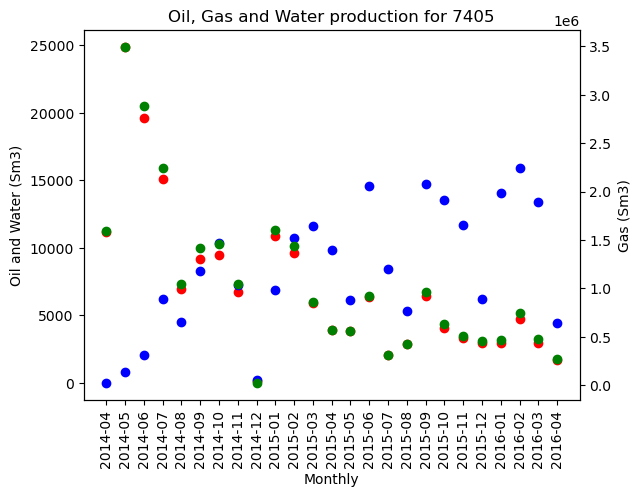

In [15]:
# Make a scatter plot of the Oil, gas and water production,
# using another axis values for the gas production

fig, ax1 = plt.subplots()
ax1.scatter(production_q["Monthly"], production_q["Oil (Sm3)"], c="red", label="Oil (Sm3)")
ax1.scatter(production_q["Monthly"], production_q["Water (Sm3)"], c="blue", label="Water (Sm3)")
ax1.set_xlabel("Monthly")
ax1.set_ylabel("Oil and Water (Sm3)")

ax2 = ax1.twinx()
ax2.scatter(production_q["Monthly"], production_q["Gas (Sm3)"], c="green", label="Gas (Sm3)")
ax2.set_ylabel("Gas (Sm3)")

ax1.set_title("Oil, Gas and Water production for 7405")
ax1.tick_params(axis='x', labelrotation=90)
plt.show()

  2. Calculate the sum of the Oil production by Volve.

In [16]:
oil_by_volve = production_data.filter(items = ["Wellbore name", "Oil (Sm3)"]).groupby("Wellbore name").agg('sum')
oil_by_volve

,Oil (Sm3)
Wellbore name,
15/9-F-1 C,177709.33
15/9-F-11,1147849.10
15/9-F-12,4579609.55
15/9-F-14,3942233.39
15/9-F-15 D,148518.56
15/9-F-4,0.00
15/9-F-5,41160.68


In [18]:
Total = round(oil_by_volve['Oil (Sm3)'].sum(), 2)
Total

10037080.61

### Merged Data

1. Create 2 new dataframes:
     1. `partial_wells_data` from `wells_data` by keeping only `wlbTotalDepthcolumns` and the common column;
     2. `partial_mpd` from `monthly_production_data` (`mpd`) by keeping only `Oil`, `Gas` `Water` and the common column and making a sum aggregation grouping by the common column;

In [19]:
partial_wells_data = wells_data.filter(items = ['wlbWellboreName', 'wlbTotalDepth']).groupby("wlbWellboreName").agg('sum')
partial_wells_data = partial_wells_data.reset_index()
partial_wells_data

,wlbWellboreName,wlbTotalDepth
0,1/2-1,3574.0
1,1/2-2,3434.0
2,1/2-U-1,111.0
3,1/2-U-2,108.0
4,1/2-U-3,107.0
...,...,...
8243,9/4-U-2,103.1
8244,9/4-U-3,154.6
8245,9/4-U-4,110.2
8246,9/4-U-5,111.6


In [20]:
partial_mpd = production_data.filter(items = ['Wellbore name', "Oil (Sm3)", "Gas (Sm3)", "Water (Sm3)"]).groupby("Wellbore name").agg('sum')
partial_mpd = partial_mpd.reset_index()
partial_mpd

,Wellbore name,Oil (Sm3),Gas (Sm3),Water (Sm3)
0,15/9-F-1 C,177709.33,2.644092e+07,207302.39
1,15/9-F-11,1147849.10,1.743105e+08,1090806.27
2,15/9-F-12,4579609.55,6.675423e+08,6833320.37
3,15/9-F-14,3942233.39,5.780095e+08,7121249.74
4,15/9-F-15 D,148518.56,2.250535e+07,52366.40
5,15/9-F-4,0.00,0.000000e+00,0.00
6,15/9-F-5,41160.68,6.561826e+06,13533.18


2. Merge both dataframes as `merged_data`

In [21]:
merged_df = partial_wells_data.merge(partial_mpd, left_on= 'wlbWellboreName', right_on='Wellbore name')
merged_df

,wlbWellboreName,wlbTotalDepth,Wellbore name,Oil (Sm3),Gas (Sm3),Water (Sm3)
0,15/9-F-1 C,4094.0,15/9-F-1 C,177709.33,2.644092e+07,207302.39
1,15/9-F-11,4562.0,15/9-F-11,1147849.10,1.743105e+08,1090806.27
2,15/9-F-12,3520.0,15/9-F-12,4579609.55,6.675423e+08,6833320.37
3,15/9-F-14,3750.0,15/9-F-14,3942233.39,5.780095e+08,7121249.74
4,15/9-F-15 D,4685.0,15/9-F-15 D,148518.56,2.250535e+07,52366.40
5,15/9-F-4,3510.0,15/9-F-4,0.00,0.000000e+00,0.00
6,15/9-F-5,3792.0,15/9-F-5,41160.68,6.561826e+06,13533.18


3. Make a scatter plot of the oil production (vertical axis) according to the total depth (horizontal axis). Is there a correlation between the depth and the production?

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='Oil (Sm3)'>

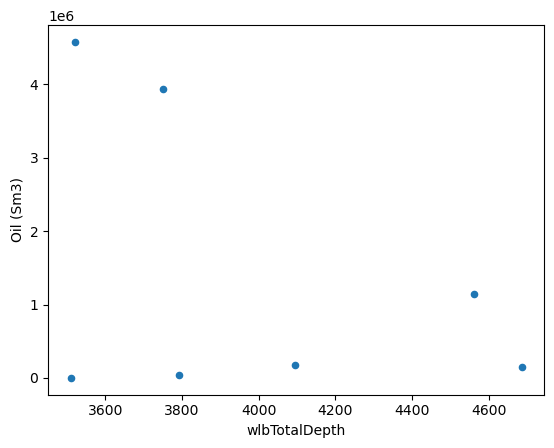

In [22]:
merged_df.plot.scatter('wlbTotalDepth', 'Oil (Sm3)')

In conclusion, there is no correlation between the depth and production data.